# Accessing the project directory on my Google Drive  

In [1]:
import os
from google.colab import drive

drive.mount('/drive', force_remount=False)
project_dir = "/drive/My Drive/RNNSeq2Seq/"

# change working directory to project_dir
os.chdir(project_dir)

Mounted at /drive


# Dependencies

In [2]:
from scripts.model import *
from scripts.dataloader import create_dataloader
from scripts.utils import *
from scripts.pytorch_utils import *
import matplotlib.pyplot as plt

# Helper function to help visualize 

In [3]:
def plot_log(log):
    len_range = len(log) -1 if "Best eval accu" in log else len(log)
    epoch_nums, train_loss, dev_loss = [], [], []
    train_acc, dev_acc = [], []

    for epoch in range(1, len_range+1):
        epoch_nums.append(epoch)
        train = log[f"Epoch#{epoch}"]["Train"]
        dev = log[f"Epoch#{epoch}"]["Eval"]
        train_loss.append(train['loss'])
        train_acc.append(train['abosulate accuracy'])

        dev_loss.append(dev['loss'])
        dev_acc.append(dev['abosulate accuracy'])

    ax1 = plt.subplot(211)
    ax1.plot(epoch_nums, train_loss, label="train loss")
    ax1.plot(epoch_nums, dev_loss, label="dev loss")
    ax1.legend()

    ax2 = plt.subplot(212)
    ax2.plot(epoch_nums, train_acc, label="train acc")
    ax2.plot(epoch_nums, dev_acc, label="dev acc")
    ax2.legend()
    plt.show()

In [4]:
folder = "tuning_data/"
experiment_num = 7
shuffle_batch = False

# must be the num of seq per seq length if shuffle_batch is False
# this "tr_batch_size" will be used for dev, and shuffled test sets
tr_batch_size = 250 
dev_batch_size = 500 if not shuffle_batch else tr_batch_size

In [5]:
# setups for training and evaluting

print_freq = 5
acc_threshold = 0.5 # for saving the best trained models 
max_epoch_num = 150 # max num of epoches 
train_acc_exit=0.92 # train acc exit threshold (eval_acc_exit must also be met)
eval_acc_exit=0.92 # dev acc exit threshold (train_acc_exit must also be met)
teacher_forcing_ratio = 1.0 # probability of using real symbol from target sequence for training

# RevStr

In [6]:
train = read_data(join(folder, "RevStr/train.txt"))
dev = read_data(join(folder, "RevStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1

In [7]:
in_vocab = ascii_lowercase
out_vocab = ascii_lowercase
in_vocab_size = len(in_vocab) + 2
out_vocab_size = len(out_vocab) + 2

hidden_size = 512
embd_dim = 256
num_layers = 1
rnn_type = "GRU"
dropout_rate = 0.0
bidirectional = False
use_attention = False
reduction_method = torch.sum

learning_rate = 5e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [8]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.966183203458786, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.013600953458808362, 'overlap rate': 0.12715602479875088}
evaluation performance: {'loss': 2.928708243370056, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.014293162268586457, 'overlap rate': 0.12821157220751048}

Current epoch: 10, 
training performance: {'loss': 2.362408384680748, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.024443054059520363, 'overlap rate': 0.24140638522803784}
evaluation performance: {'loss': 2.748678570985794, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.025189777510240673, 'overlap rate': 0.13079096134752036}

Current epoch: 15, 
training performance: {'loss': 1.7772512406110763, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.062268873350694774, 'overlap rate': 0.40749945268034937}
evaluation performance: {'loss': 2.65402712225914, 'abosulate accuracy': 0.00045000002719461916, 'consecutive over

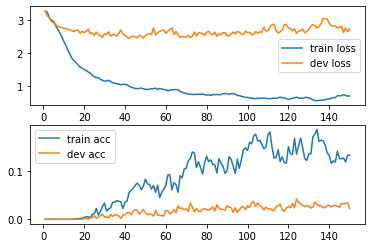

In [9]:
plot_log(log)

## Hyperparameter set 2

In [10]:
hidden_size = 256
embd_dim = 256
num_layers = 1
rnn_type = "GRU"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.0436935842037203, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.01159117225324735, 'overlap rate': 0.11075395215302705}
evaluation performance: {'loss': 3.0357608795166016, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.009488593379501253, 'overlap rate': 0.1144787872210145}

Current epoch: 10, 
training performance: {'loss': 2.743970292806625, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.016472045402042567, 'overlap rate': 0.16418418884277344}
evaluation performance: {'loss': 2.8821513295173644, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.016261432669125497, 'overlap rate': 0.11782760620117187}

Current epoch: 15, 
training performance: {'loss': 2.299111548066139, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.03174904077313841, 'overlap rate': 0.2745090689510107}
evaluation performance: {'loss': 2.8226803839206696, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.030443

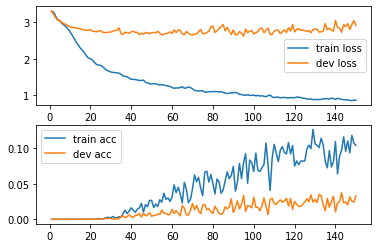

In [12]:
plot_log(log)

## Hyperparameter set 3

In [13]:
hidden_size = 512
embd_dim = 256
num_layers = 1
rnn_type = "GRU"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.2799940288066862, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.021729836706072092, 'overlap rate': 0.05804081838577986}
evaluation performance: {'loss': 3.2662311434745788, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.02758123609237373, 'overlap rate': 0.07709163222461939}

Current epoch: 10, 
training performance: {'loss': 3.174390411376953, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0157912562135607, 'overlap rate': 0.07938262270763516}
evaluation performance: {'loss': 3.19934167265892, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.014746000769082456, 'overlap rate': 0.08244855375960469}

Current epoch: 15, 
training performance: {'loss': 3.108612835407257, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.013070932496339083, 'overlap rate': 0.08986866027116776}
evaluation performance: {'loss': 3.1293698847293854, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0133695

KeyboardInterrupt: ignored

## Hyperparameter set 4

In [15]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "GRU"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.8287663221359254, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.015277009818237274, 'overlap rate': 0.14635958038270475}
evaluation performance: {'loss': 2.865295261144638, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.01474909852258861, 'overlap rate': 0.1305018374696374}

Current epoch: 10, 
training performance: {'loss': 2.044013020396233, 'abosulate accuracy': 0.00010000000474974513, 'consecutive overlap rate': 0.04025528645142913, 'overlap rate': 0.33000101037323476}
evaluation performance: {'loss': 2.7042990237474442, 'abosulate accuracy': 0.00010000000474974513, 'consecutive overlap rate': 0.040605326555669306, 'overlap rate': 0.152655023150146}

Current epoch: 15, 
training performance: {'loss': 1.6321460455656052, 'abosulate accuracy': 0.0005000000121071935, 'consecutive overlap rate': 0.07743947333656251, 'overlap rate': 0.4498606607317924}
evaluation performance: {'loss': 2.5831675678491592, 'abosulate

# RedStr



In [17]:
train = read_data(join(folder, "RedStr/train.txt"))
dev = read_data(join(folder, "RedStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [18]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "GRU"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.290793716907501, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0017564151567057706, 'overlap rate': 0.026908843091223388}
evaluation performance: {'loss': 3.299828213453293, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.00139279624709161, 'overlap rate': 0.03845083527266979}

Current epoch: 10, 
training performance: {'loss': 3.2758583784103394, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0025324704562081023, 'overlap rate': 0.029770344495773315}
evaluation performance: {'loss': 3.2778669476509092, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.002443590511393268, 'overlap rate': 0.04499105485156178}

Current epoch: 15, 
training performance: {'loss': 3.203351366519928, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.008443748613353818, 'overlap rate': 0.05810352778062224}
evaluation performance: {'loss': 3.201195764541626, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0

## Hyperparameter set 2

In [20]:
hidden_size = 512
embd_dim = 256
num_layers = 1
rnn_type = "GRU"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.3039891362190246, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0016231497247645166, 'overlap rate': 0.023858938203193247}
evaluation performance: {'loss': 3.297015994787216, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.001604415579640772, 'overlap rate': 0.03917431868612766}

Current epoch: 10, 
training performance: {'loss': 3.273659956455231, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.002890962980745826, 'overlap rate': 0.03372814329341054}
evaluation performance: {'loss': 3.2817602276802065, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0022839934361400084, 'overlap rate': 0.04298114040866494}

Current epoch: 15, 
training performance: {'loss': 3.2790352165699006, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.002169647524715401, 'overlap rate': 0.04511278090067208}
evaluation performance: {'loss': 3.2732113361358643, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0